# Therapeutic Target Analysis
This notebook presents a clean and portable version of the therapeutic target analysis project. It consolidates and refactors the content of previous parallel notebooks into a single, coherent workflow.

## 1. Setup and Configuration
All file paths should be located within the `/data/` directory. This directory is assumed to be mounted via Google Drive or another shared file system. <br> Fun lies ahead

In [1]:
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from collections import defaultdict

from pathlib import Path
# Easy import of all required libraries, type in the terminal:
# pip3 install -r requirements.txt

In [2]:
# Import custom gene_tools package
sys.path.append(os.path.abspath("."))

In [3]:
# Load the package
import importlib
import gene_tools as gt

In [ ]:
#Exemple of how to access a package (if not explicitely imported in gene_tools/__init__.py)
gt.analysis.NaCount()

# Exemple of easy access (for functions explicitely imported in gene_tools/__init__.py):
gt.NaCount()

## 2. Data Loading
This section loads the input datasets required for downstream analysis. You need to have Google Drive installed on your machine, connected to an account with access to the "ProjetBioinfo_data" folder. You can add it to your main Google Drive by going to <br> 
`Shared with me > ProjetBioinfo > Organise > Create shortcut > Add to Google Drive`. 
<br>
You will need to create an alias named `data` in your local ProjectBioinfo folder pulled from github that redirects to the `ProjectBioinfo` folder (or shortcut) of your Google Drive.

In [4]:
# Create paths to folders
root_path = os.path.join('data', '00_BPStart/00_gene_prioritization')
folders = ['eQTL_GWAS_blood', 'Exome', 'GWAS', 'pQTL_GWAS']

In [5]:
traits = []
for i in folders:
    fpath = os.path.join(root_path, i)
    nms = [f.split('_')[0] for f in os.listdir(fpath)] #some names in the 'merged' file are longer than just the trait code, we avoid this here by spliting at first '_'
    for n in nms :
      if n not in traits:
        traits.append(n)

In [5]:
len(traits)

30

## 3. Pipeline

## 4. Functions definitions - archive purpose only!
See the gene_tools.py file for stable versions of these functions.

### a) Toy data

In [ ]:
import numpy as np
import pandas as pd
mock_data = np.random.binomial(20, 0.5, 6)
mock = pd.DataFrame(data = {'Score' : mock_data,
                            'Names' : ['Mich', 'Juju', 'Marc', 'Steph', 'Bubule', 'Sam']})

In [ ]:
mock['Rank'] = mock['Score'].rank(ascending=False)

In [ ]:
mock

In [ ]:
mock.sort_values(by = ['Rank'])

### b) Functions archive

In [ ]:
#Lists all traits used by each method
namesDic = {}
for i in folders:
    fpath = os.path.join(root_path, i)
    nms = [f.split('_')[0] for f in os.listdir(fpath)] #some names in the 'merged' file are longer than just the trait code, we avoid this here by spliting at first '_'
    namesDic[i] = nms


#Find different traits between methods
ref = list(namesDic.values())[0] #Set an arbitrary ref

print(f'Reference: {list(namesDic.keys())[0]}\nLength: {len(ref)}\n{ref}\n')

for k, v in namesDic.items():
    nref = [] #list of values not in ref
    nval = [] #list of values not in current key
    shared = 0

    for i in v : #is current value list in the ref ?
        if i not in ref :
            nref.append(i)
        else:
            shared += 1

    for r in ref: #is the ref in the current value ?
        if r not in v:
            nval.append(r)

    print(f'{k}: \n\tValue different from ref: \t{nref}\n\tRef different than value: \t{nval}\n\tShared: \t\t\t{shared}')

Reference: eQTL_GWAS_blood
Length: 30
['RA', 'PNEUMONIA', 'eGFR', 'T1D', 'VTE', 'SBP', 'T2D', 'PSORIASIS', 'SCZ', 'EPILEPSY', 'BIPOLAR', 'ENDOMETRIOSIS', 'MS', 'AD', 'ASTHMA', 'PD', 'AF', 'CAD', 'COPD', 'BMD', 'MDD', 'LOAD', 'TC', 'IBD', 'DBP', 'OA', 'STROKE', 'GLAUCOMA', 'LDL', 'IBS']

eQTL_GWAS_blood: 
	Value different from ref: 	[]
	Ref different than value: 	[]
	Shared: 			30
Exome: 
	Value different from ref: 	[]
	Ref different than value: 	[]
	Shared: 			30
GWAS: 
	Value different from ref: 	[]
	Ref different than value: 	[]
	Shared: 			30
pQTL_GWAS: 
	Value different from ref: 	[]
	Ref different than value: 	[]
	Shared: 			30


In [ ]:
#First big dico of values (execute locally or it takes forever)
all_dat = defaultdict(list)
for f in folders:
    fpath = os.path.join(root_path, f)
    for files in os.listdir(fpath):
        fname = files.split('_')[0]
        df = pd.read_csv(os.path.join(fpath, files), sep= '\t')
        df = df.drop_duplicates(subset="EnsemblId", keep="first")
        all_dat[fname].append(df)
df

,Trait,Method,EnsemblId,Gene,Rank,Percentile,b_ivw,p_value
0,IBS,pQTL-GWAS,ENSG00000131238,PPT1,1,0.051975,-0.079461,0.000001
1,IBS,pQTL-GWAS,ENSG00000063176,SPHK2,2,0.103950,0.207589,0.000210
2,IBS,pQTL-GWAS,ENSG00000204539,CDSN,3,0.155925,-0.302578,0.000309
3,IBS,pQTL-GWAS,ENSG00000204256,BRD2,4,0.207900,0.273912,0.000332
4,IBS,pQTL-GWAS,ENSG00000176204,LRRTM4,5,0.259875,-0.245920,0.000500
...,...,...,...,...,...,...,...,...
1892,IBS,pQTL-GWAS,ENSG00000166311,SMPD1,1920,99.792100,-0.000026,0.997278
1893,IBS,pQTL-GWAS,ENSG00000251322,SHANK3,1921,99.844075,0.000022,0.998502
1894,IBS,pQTL-GWAS,ENSG00000244486,SCARF2,1922,99.896050,-0.000045,0.998569
1895,IBS,pQTL-GWAS,ENSG00000163382,APOA1BP,1923,99.948025,0.000106,0.999127


In [ ]:
for trait in all_dat:
  for method in all_dat[trait]:
    if method["Method"][0] =="eQTL_GWAS_blood" or  method["Method"][0] =="pQTL-GWAS":
      threshold = 0.05 / len(method)

      futurbeta = method["p_value"] <= threshold
      futurpval = method["p_value"] > threshold

      betas = method.loc[futurbeta,"b_ivw"].abs()

      pvalues = method.loc[futurpval,"p_value"]

      betasort = betas.sort_values(ascending = False)

      betarank = betasort.rank(method="min",ascending=False)

      nbeta = len(betasort)

      pvaluesort = pvalues.sort_values(ascending =True)

      pvaluerank = pvaluesort.rank(method ="min",ascending = True)

      pvaluerank += nbeta

      bothranks = pd.concat([betarank,pvaluerank])/len(method)

      method["Ranking"] = bothranks

    else :
      method["Ranking"] = method["p_value"].rank(method="min",ascending = True)/len(method)



In [ ]:
#Clean data
cleaned = {}
for k, v in all_dat.items(): #k = key (trait), v = list of df (1 per method)

    # Create a dictionary of cleaned dfs for each trait
    traitDic = {}
    for met in v: #for every df stored by trait
        met_name = met['Method'][0].split('-')[0]
        data = {
            'EnsemblId' : met['EnsemblId'],
            f'{met_name}_ranking' : met['Ranking']
        }
        verif = {
            'EnsemblId' : met['EnsemblId'],
            'Trait' : k,
        }

        #if 'b_ivw' in met.columns:
        #        data[f'{met_name}_b_ivw'] = met['b_ivw']

        vdf = pd.DataFrame(data = verif)
        fdf = pd.DataFrame(data = data)
        traitDic[met['Method'][0]] = [fdf, vdf]

    #Merge all dfs per trait
    keys = list(traitDic.keys())
    merged_df = traitDic[keys[0]][1]
    merged_df = pd.merge(merged_df, traitDic[keys[0]][0])
    for i in range(1, (len(keys))):
        df = traitDic[keys[i]][0]
        merged_df = pd.merge(merged_df, df, how='outer', on='EnsemblId')

    # Add scores, rank and percentile

    merged_df['Score'] = [0 for i in range(len(merged_df))]

    merged_df['Rank'] = merged_df['Score'].rank()

    merged_df['Percentile'] = merged_df['Rank'] / len(merged_df)

    cleaned[k] = merged_df

In [ ]:
for trait in cleaned:
    cleaned[trait] = cleaned[trait].drop_duplicates(subset="EnsemblId", keep="first")
cleaned["PNEUMONIA"]
vc = cleaned['PNEUMONIA']['EnsemblId'].value_counts()
dupes = [gene for gene in vc.index if vc[gene] > 1]
len(dupes)

0

### Na handling

In [ ]:
def NAhandling(dico,maxNA) :
  dictionnary = {}
  for trait in dico :
    data = dico[trait]
    genes =list(dico[trait]["EnsemblId"])
    methods = [column for column in dico[trait].columns if len(column.split("_")) > 1 and column.split("_")[1] =="ranking" ]

    numNA = data[methods].isna().sum(axis=1)

    NAfiltdf = data[numNA == maxNA].copy()
    dictionnary[f"{trait}_{maxNA}_NA"] = NAfiltdf

  return dictionnary
Zero_NA = NAhandling(cleaned,0)
One_NA = NAhandling(cleaned,1)
Two_NA = NAhandling(cleaned,2)

In [ ]:
for trait in One_NA:
  print(f"{trait}: {len(One_NA[trait])}")

RA_1_NA: 11383
PNEUMONIA_1_NA: 11373
eGFR_1_NA: 11378
T1D_1_NA: 11183
VTE_1_NA: 11368
SBP_1_NA: 11276
T2D_1_NA: 11361
PSORIASIS_1_NA: 11373
SCZ_1_NA: 11174
EPILEPSY_1_NA: 10989
BIPOLAR_1_NA: 11381
ENDOMETRIOSIS_1_NA: 11353
MS_1_NA: 11336
AD_1_NA: 11383
ASTHMA_1_NA: 11358
PD_1_NA: 11363
AF_1_NA: 11395
CAD_1_NA: 11375
COPD_1_NA: 11382
BMD_1_NA: 11348
MDD_1_NA: 11324
LOAD_1_NA: 11388
TC_1_NA: 11334
IBD_1_NA: 11346
DBP_1_NA: 11246
OA_1_NA: 11366
STROKE_1_NA: 11359
GLAUCOMA_1_NA: 11366
LDL_1_NA: 11334
IBS_1_NA: 11376


## 5. Data representaion

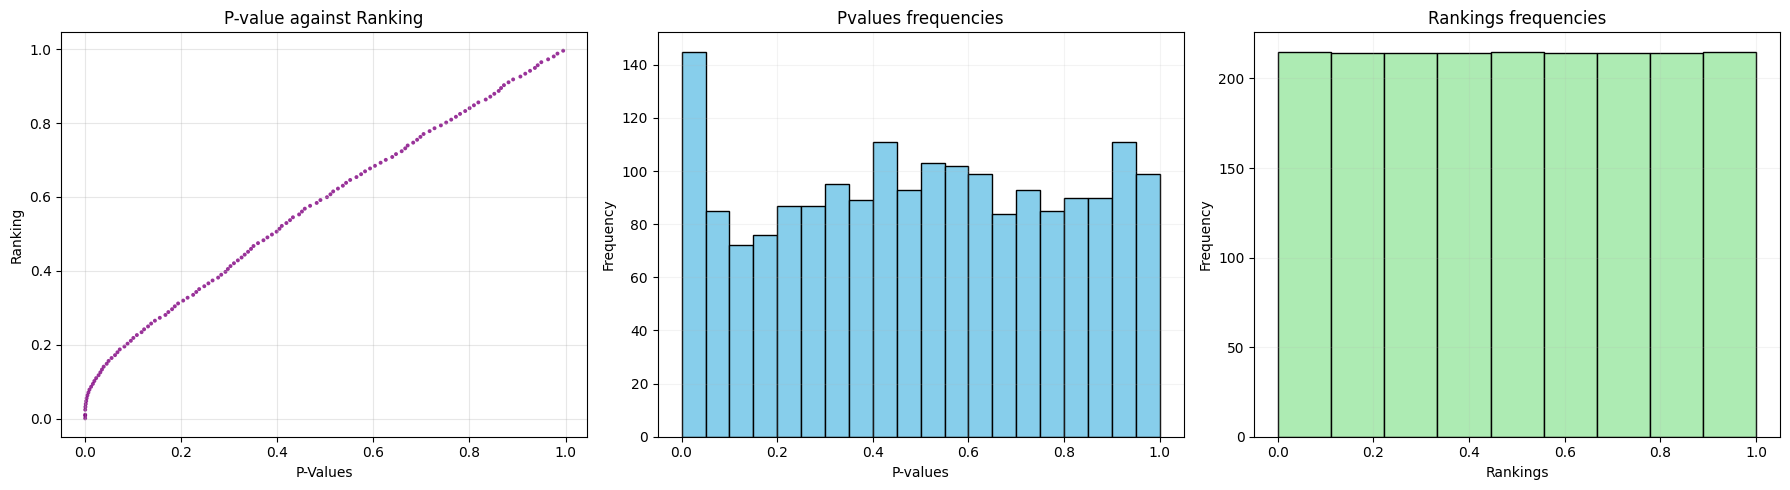

In [ ]:
dataplot = all_dat["LDL"]

for df in dataplot:
  if df["Method"][0] == "GWAS" :
    dataplot = df
pvalue =df["p_value"][::15];ranking = df["Ranking"][::15]
plt.figure(figsize=(18,5))
plt.subplot(1, 3, 1)
plt.scatter(pvalue,ranking,s=8,alpha=0.8,color="purple",edgecolors="none")
plt.xlabel("P-Values");plt.ylabel("Ranking")
plt.title("P-value against Ranking")
plt.grid(True,linestyle="-",alpha=0.3)

pvalue =df["p_value"];ranking = df["Ranking"]


plt.subplot(1,3,2)
plt.hist(pvalues.dropna(),bins=20,color="skyblue",edgecolor="black")
plt.xlabel("P-values");plt.ylabel("Frequency")
plt.title("Pvalues frequencies")
plt.grid(True,linestyle = "-",alpha = 0.15)


plt.subplot(1, 3, 3)
plt.hist(ranking.dropna(), bins=9, color="#ADEBB3", edgecolor='black')
plt.xlabel('Rankings')
plt.ylabel('Frequency')
plt.title('Rankings frequencies')
plt.grid(True, linestyle='-', alpha=0.15)

plt.savefig('expl_analysis.png', dpi=300, bbox_inches='tight')
plt.tight_layout()